# Downloading and Inspecting Real Market Data

In [4]:
import yfinance as yf
import pandas as pd

# Download stock data for multiple assets
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start='2018-01-01', end='2024-12-31')

# Focus on 'Close' prices
data = data['Close']

# Display first few rows
print(data.head())


[*********************100%***********************]  5 of 5 completed

Ticker           AAPL       AMZN      GOOGL       MSFT       TSLA
Date                                                             
2018-01-02  40.479832  59.450500  53.405170  79.474167  21.368668
2018-01-03  40.472790  60.209999  54.316319  79.844025  21.150000
2018-01-04  40.660782  60.479500  54.527306  80.546783  20.974667
2018-01-05  41.123718  61.457001  55.250351  81.545395  21.105333
2018-01-08  40.970978  62.343498  55.445419  81.628609  22.427334


# Visualizing Stock Price Trends

<Figure size 1400x600 with 0 Axes>

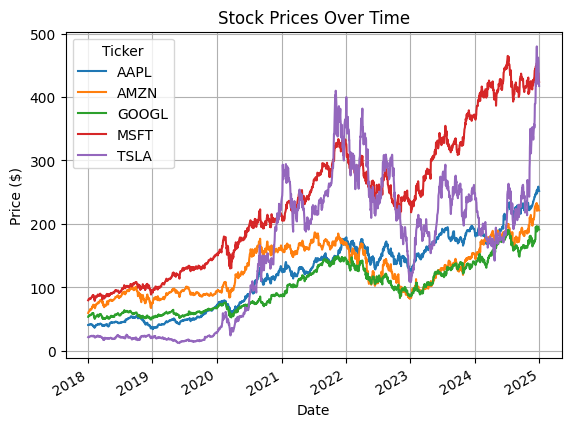

In [6]:
import matplotlib.pyplot as plt

# Plot multiple stock prices
plt.figure(figsize=(14,6))
data.plot()
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


# Calculating and Visualizing Returns

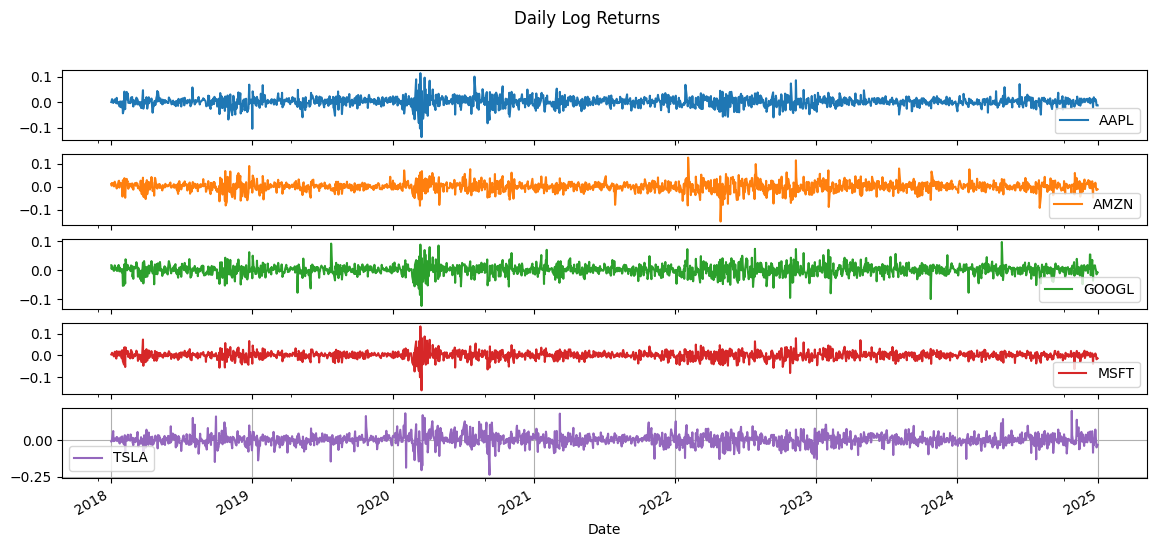

In [11]:
import numpy as np

# Calculate daily log returns
returns = data.pct_change().apply(lambda x: np.log(1 + x))

# Plot returns
returns.plot(figsize=(14,6), subplots=True, title="Daily Log Returns")
plt.grid(True)
plt.show()


# Volatility Analysis (Rolling Standard Deviation)

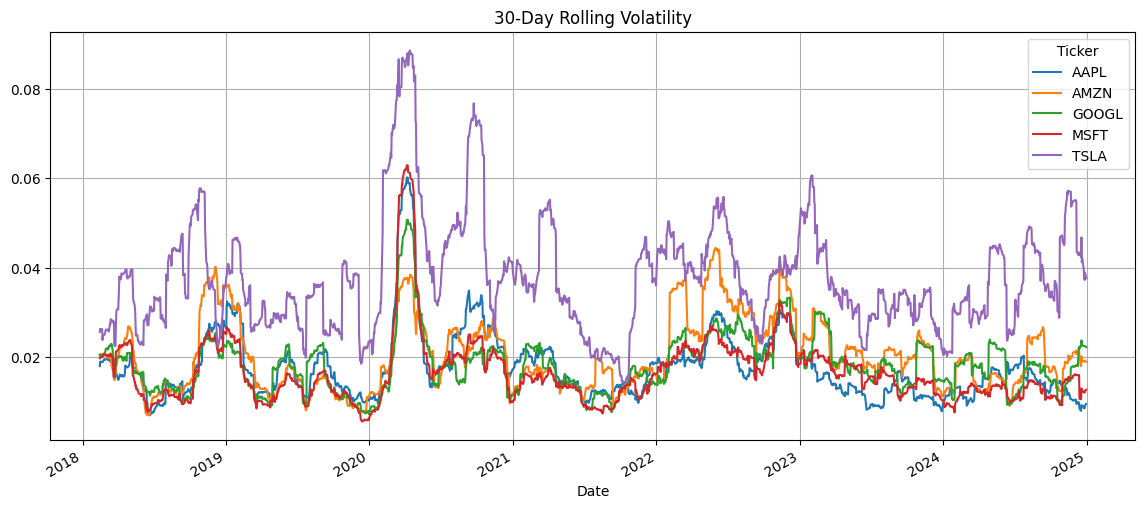

In [14]:
# Calculate rolling volatility (30-day window)
rolling_volatility = returns.rolling(30).std()

# Plot
rolling_volatility.plot(figsize=(14,6))
plt.title("30-Day Rolling Volatility")
plt.grid(True)
plt.show()


# Correlation Analysis Between Assets

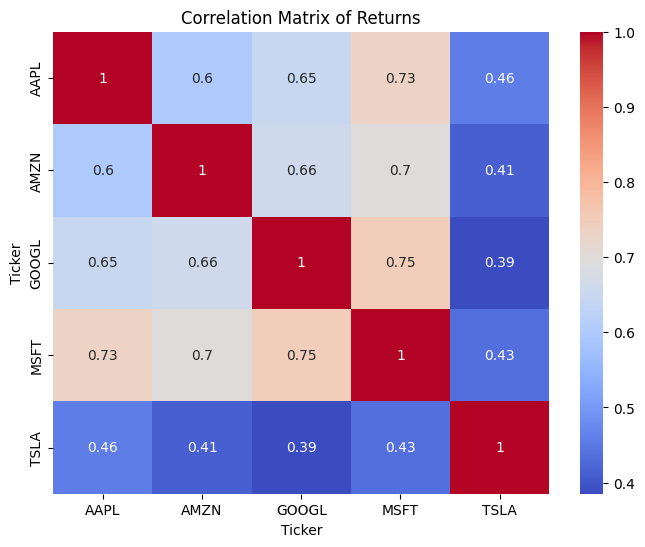

In [18]:
import seaborn as sns

# Correlation matrix
corr = returns.corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Returns")
plt.show()


# Basic Anomaly Detection (Z-Score on Returns)

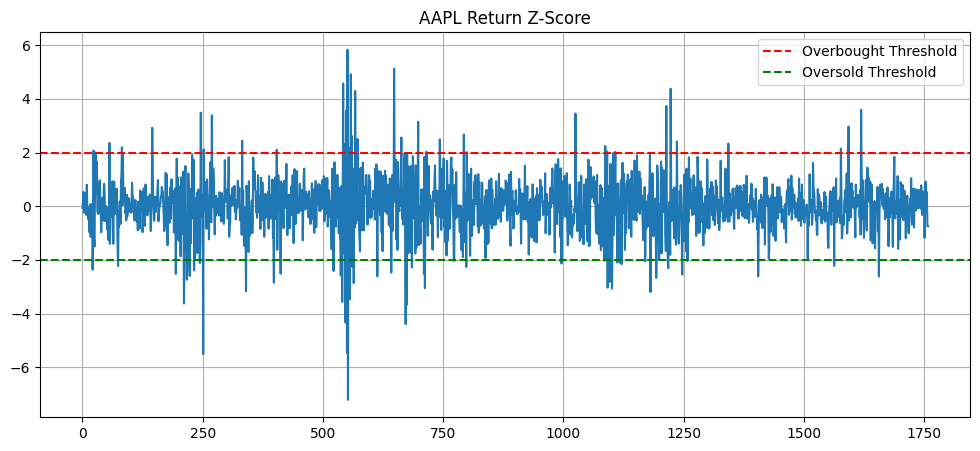

In [21]:
# Compute Z-Score for AAPL returns
from scipy.stats import zscore

z_scores = zscore(returns['AAPL'].dropna())

plt.figure(figsize=(12,5))
plt.plot(z_scores)
plt.axhline(2, color='r', linestyle='--', label='Overbought Threshold')
plt.axhline(-2, color='g', linestyle='--', label='Oversold Threshold')
plt.legend()
plt.title("AAPL Return Z-Score")
plt.grid(True)
plt.show()
